In [1]:
import pandas as pd
import numpy as np
import swifter
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import operator
import data_prep_final as d
import functions as f
import models as m
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.utils import resample
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from yellowbrick.classifier import ConfusionMatrix
from imblearn.over_sampling import SMOTE
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)

In [3]:
X, y, X_no_nbr = d.clean()

Upload
y_clean
column_drop
null_value_drop
x_clean
values_lower
column_lowercase
categorize_all



diagnoses_1_3



diagnoses_2_3



diagnoses_3_3



number_meds



num_down



num_up



reset_indices
X_dummy_variables


DUMMY REGRESSION
Test Accuracy score:  0.5336308446910304


C:\Users\Rocio\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Test F1 score:  0.0


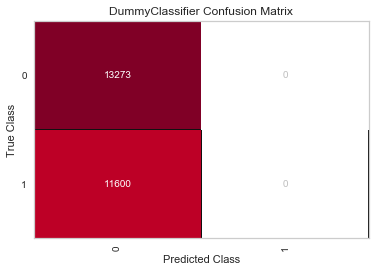

UNBALANCED REGRESSION
Test Accuracy score:  0.6160897358581594
Test F1 score:  0.5078088758311426


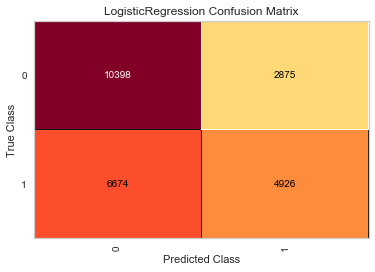

UPSAMPLED REGRESSION
Test Accuracy score:  0.6164515739958991
Test F1 score:  0.5659295659295659


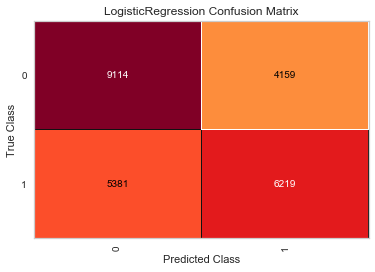

DOWNSAMPLED REGRESSION
Test Accuracy score:  0.615808306195473
Test F1 score:  0.5667392092854553


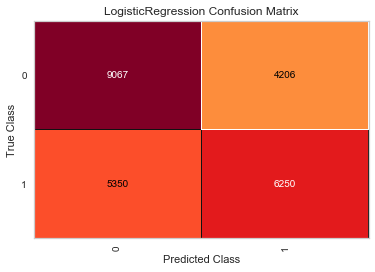

SMOTE REGRESSION
Test Accuracy score:  0.6099786917541109
Test F1 score:  0.5227999409710266


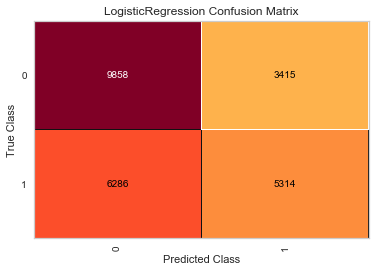

In [3]:
m.run_all_regressions(X_no_nbr, y)

In [4]:
X, y = f.remove_repeats_deaths(X, y)

DUMMY REGRESSION
Test Accuracy score:  0.5870994248151191


C:\Users\Rocio\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Test F1 score:  0.0


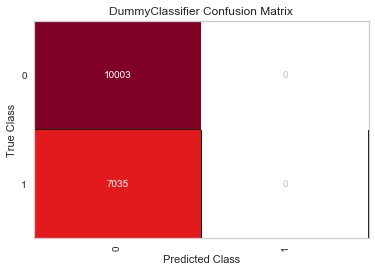

UNBALANCED REGRESSION
Test Accuracy score:  0.6235473647141684
Test F1 score:  0.34403763550828387


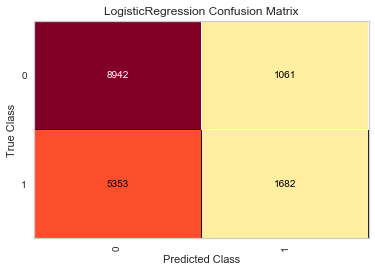

UPSAMPLED REGRESSION
Test Accuracy score:  0.6042375865711938
Test F1 score:  0.535253980288097


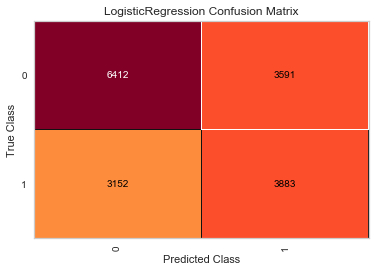

DOWNSAMPLED REGRESSION
Test Accuracy score:  0.6012442774973589
Test F1 score:  0.5324156916724019


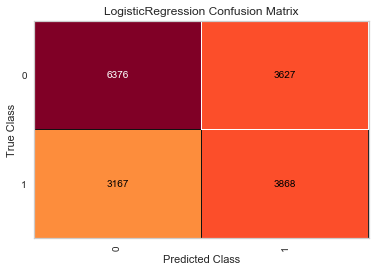

SMOTE REGRESSION
Test Accuracy score:  0.6098133583753962
Test F1 score:  0.39009174311926603


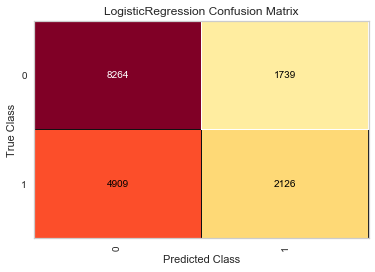

In [5]:
m.run_all_regressions(X, y)

In [ ]:
rfc = RandomForestClassifier(n_estimators=300, max_features= 'sqrt', max_depth= 5,  oob_score=True)
cv = cross_validate(rfc, X, y, return_estimator=True, cv=5)
est = cv['estimator'][3]

print(est.oob_score_)

index = X.columns.tolist()
feat_imp = pd.DataFrame(est.feature_importances_, index = index, columns = ['importances'])
feat_imp.sort_values(by = 'importances', ascending = False)

In [ ]:
data = f.concat(X, y)

In [ ]:
data_gluc = data.loc[(data['glu_200_300'] == 1) | (data['glu_over_300'] == 1) | (data['glu_norm'] == 1)]

data_a1 = data.loc[(data['a1_7_8'] == 1) | (data['a1_norm'] == 1) | (data['al_over_8'] == 1)]

data_gluc = data_gluc.drop(columns = ['icd_11', 'icd_14', 'icd_15', 'repaglinide_up', 'glimepiride_down',
                                     'glimepiride_up', 'pioglitazone_down', 'pioglitazone_up',
                                      'rosiglitazone_down', 'rosiglitazone_up'])

X_gluc = data_gluc.drop(columns = ['readmitted'])
y_gluc = data_gluc.readmitted

In [ ]:
m.run_all_regressions(X_gluc, y_gluc)

In [ ]:
rfc = RandomForestClassifier(n_estimators=300, max_features= 'sqrt', max_depth= 5,  oob_score=True)
cv = cross_validate(rfc, X_gluc, y_gluc, return_estimator=True, cv=5)
est = cv['estimator'][3]

print(est.oob_score_)

index = X_gluc.columns.tolist()
feat_imp = pd.DataFrame(est.feature_importances_, index = index, columns = ['importances'])
feat_imp.sort_values(by = 'importances', ascending = False)

In [ ]:
def y_split_race(X_train, y_train):
    training = pd.concat([X_train, y_train], axis=1)
    training_aa = training[training['african_american'] == 1]
    training_asian = training[training['asian'] == 1]
    training_hispanic = training[training['hispanic'] == 1]
    training_other = training[training['other'] == 1]
    training_cauc = training[(training['african_american'] == 0) & (
        training['asian'] == 0) & (training['hispanic'] == 0) & (training['other'] == 0)]
    return training_aa, training_asian, training_hispanic, training_other, training_cauc

In [ ]:
gluc_aa, gluc_asian, gluc_hispanic, gluc_other, gluc_cauc = y_split_race(X_gluc, y_gluc)

gluc_aa_upsampled = resample(gluc_aa,
                             replace=True,  # sample with replacement
                             # match number in majority class
                             n_samples=len(gluc_cauc),
                             random_state=23)  # reproducible results
gluc_asian_upsampled = resample(gluc_asian,
                                replace=True,  # sample with replacement
                                # match number in majority class
                                n_samples=len(gluc_cauc),
                                random_state=23)  # reproducible results
gluc_hispanic_upsampled = resample(gluc_hispanic,
                                   replace=True,  # sample with replacement
                                   # match number in majority class
                                   n_samples=len(gluc_cauc),
                                   random_state=23)  # reproducible results
gluc_other_upsampled = resample(gluc_other,
                                replace=True,  # sample with replacement
                                # match number in majority class
                                n_samples=len(gluc_cauc),
                                random_state=23)  # reproducible results

upsampled = pd.concat([gluc_cauc, gluc_aa_upsampled, gluc_asian_upsampled,
                       gluc_hispanic_upsampled, gluc_other_upsampled])

upsampled_X = upsampled.drop(columns = ['readmitted'])
upsampled_y = upsampled.readmitted

X_train, X_test, y_train, y_test = train_test_split(
    upsampled_X, upsampled_y, test_size=0.25, random_state=23)

dummy_binary(X_train, y_train, X_test, y_test)

reg_unbalanced(X_train, y_train, X_test, y_test)

no, yes = y_split(X_train, y_train)

upsample(no, yes, X_test, y_test)

downsampled(no, yes, X_test, y_test)

smote(upsampled_X, upsampled_y, test_size=0.25, random_state=23)

rfc = RandomForestClassifier(n_estimators=300, max_features= 'sqrt', max_depth= 5,  oob_score=True)
cv = cross_validate(rfc, upsampled_X, upsampled_y, return_estimator=True, cv=5)
est = cv['estimator'][3]

print(est.oob_score_)

index = upsampled_X.columns.tolist()
feat_imp = pd.DataFrame(est.feature_importances_, index = index, columns = ['importances'])
feat_imp.sort_values(by = 'importances', ascending = False)

rfc = RandomForestClassifier(n_estimators=300, max_features= 'sqrt', max_depth= 7,  oob_score=True)
cv = cross_validate(rfc, upsampled_X, upsampled_y, return_estimator=True, cv=5)
est = cv['estimator'][3]

print(est.oob_score_)

index = upsampled_X.columns.tolist()
feat_imp = pd.DataFrame(est.feature_importances_, index = index, columns = ['importances'])
feat_imp.sort_values(by = 'importances', ascending = False)

In [ ]:
gluc_cauc_downsampled = resample(gluc_cauc,
                             replace=True,  # sample with replacement
                             # match number in majority class
                             n_samples=len(gluc_aa),
                             random_state=23)  # reproducible results
gluc_asian_upsampled = resample(gluc_asian,
                                replace=True,  # sample with replacement
                                # match number in majority class
                                n_samples=len(gluc_aa),
                                random_state=23)  # reproducible results
gluc_hispanic_upsampled = resample(gluc_hispanic,
                                   replace=True,  # sample with replacement
                                   # match number in majority class
                                   n_samples=len(gluc_aa),
                                   random_state=23)  # reproducible results
gluc_other_upsampled = resample(gluc_other,
                                replace=True,  # sample with replacement
                                # match number in majority class
                                n_samples=len(gluc_aa),
                                random_state=23)  # reproducible results

midsampled = pd.concat([gluc_cauc_downsampled, gluc_aa, gluc_asian_upsampled,
                        gluc_hispanic_upsampled, gluc_other_upsampled])

midsampled_X = midsampled.drop(columns = ['readmitted'])
midsampled_y = midsampled.readmitted

X_train, X_test, y_train, y_test = train_test_split(
    midsampled_X, midsampled_y, test_size=0.25, random_state=23)

dummy_binary(X_train, y_train, X_test, y_test)

reg_unbalanced(X_train, y_train, X_test, y_test)

no, yes = y_split(X_train, y_train)

upsample(no, yes, X_test, y_test)

downsampled(no, yes, X_test, y_test)

smote(midsampled_X, midsampled_y, test_size=0.25, random_state=23)

In [ ]:
data_a1 = data_a1.drop(columns = ['icd_15', 'repaglinide_down'])

X_a1 = data_a1.drop(columns = ['readmitted'])
y_a1 = data_a1.readmitted

X_train, X_test, y_train, y_test = train_test_split(
    X_a1, y_a1, test_size=0.25, random_state=23)

dummy_binary(X_train, y_train, X_test, y_test)

reg_unbalanced(X_train, y_train, X_test, y_test)

no, yes = y_split(X_train, y_train)

upsample(no, yes, X_test, y_test)

downsampled(no, yes, X_test, y_test)

smote(X_a1, y_a1, test_size=0.25, random_state=23)

In [ ]:
data_a1_glu_200_300 = data_a1.loc[data_a1.glu_200_300 == 1]
data_a1_glu_over_300 = data_a1.loc[data_a1.glu_over_300 == 1]
data_a1_glu_norm = data_a1.loc[data_a1.glu_norm == 1]
data_a1_glu_none = data_a1.loc[(data_a1.glu_norm == 0)&(data_a1.glu_over_300 == 0)&(data_a1.glu_200_300 == 0)]

up_a1_glu_200_300 = resample(data_a1_glu_200_300,
                             replace=True,  # sample with replacement
                             # match number in majority class
                             n_samples=3120,
                             random_state=23)  # reproducible results
up_a1_glu_over_300 = resample(data_a1_glu_over_300,
                              replace=True,  # sample with replacement
                              # match number in majority class
                              n_samples=3120,
                              random_state=23)  # reproducible results
up_a1_glu_norm = resample(data_a1_glu_norm,
                          replace=True,  # sample with replacement
                          # match number in majority class
                          n_samples=3120,
                          random_state=23)  # reproducible results
up_a1_glu_none = resample(data_a1_glu_none,
                          replace=True,  # sample with replacement
                          # match number in majority class
                          n_samples=3120,
                          random_state=23)  # reproducible results

up_a1_gluc = pd.concat([up_a1_glu_200_300, up_a1_glu_over_300, up_a1_glu_norm])

up_a1_gluc_X = up_a1_gluc.drop(columns=['readmitted'])
up_a1_gluc_y = up_a1_gluc.readmitted

X_train, X_test, y_train, y_test = train_test_split(
    up_a1_gluc_X, up_a1_gluc_y, test_size=0.25, random_state=23)

dummy_binary(X_train, y_train, X_test, y_test)

reg_unbalanced(X_train, y_train, X_test, y_test)

no, yes = y_split(X_train, y_train)

upsample(no, yes, X_test, y_test)

downsampled(no, yes, X_test, y_test)

smote(up_a1_gluc_X, up_a1_gluc_y, test_size=0.25, random_state=23)